In [11]:
import os, time, glob, socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
random.seed(123)
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

In [12]:
path = r"C:\Users\user\Desktop\MLproject"

In [13]:
# 已經補植完成後的

train_imp = pd.read_csv(path + r"\train_mice_imp.csv",sep=",",engine='python')
test_imp = pd.read_csv(path + r"/test_mice_imp.csv",sep=",",engine='python')
print(train_imp.shape) # sale price  #要去刪csv
print(test_imp.shape)

(1460, 231)
(1459, 231)


# 分連續、類別變數

In [14]:
# 類別 varname
with open(file=path+'\data_all_cate_varname.lst',mode="rb") as inhis :  
    data_all_cate = pickle.load(file=inhis)                    

In [15]:
print(data_all_cate)

Index(['OverallQual', 'OverallCond', 'LotShape', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       ...
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'MiscFeature_unknown', 'CentralAir_N',
       'CentralAir_Y'],
      dtype='object', length=196)


In [16]:
# 連續 varname

with open(file=path+'\data_cont_varname.lst',mode="rb") as inhis :  
    data_cont= pickle.load(file=inhis)      

In [17]:
data_cont=data_cont.drop('Id')

In [18]:
data_cont

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

# 分 train test 連續 & 類別

In [19]:
train_cate=train_imp[data_all_cate]
train_cont=train_imp[data_cont] #saleprice已經拿掉
test_cate=test_imp[data_all_cate]
test_cont=test_imp[data_cont]  #saleprice已經拿掉

print(train_cate.shape)
print(train_cont.shape)
print(test_cate.shape)
print(test_cont.shape)

(1460, 196)
(1460, 34)
(1459, 196)
(1459, 34)


### 對 train連續變數做pca

In [20]:
pd.set_option("display.max_columns", None)
train_cont.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [21]:
#拿掉id--train
train_cont=train_cont.drop("Id", axis=1)

#拿掉id--test
test_cont=test_cont.drop("Id", axis=1)

KeyError: "['Id'] not found in axis"

In [22]:
# 數據標準化
ss = StandardScaler()
train_cont_std= ss.fit_transform(train_cont)
test_cont_std=ss.fit_transform(test_cont)

In [23]:
#  PCA
pca=PCA(n_components=0.8,copy=True, whiten=False)
train_cont_pca=pca.fit_transform(train_cont_std)

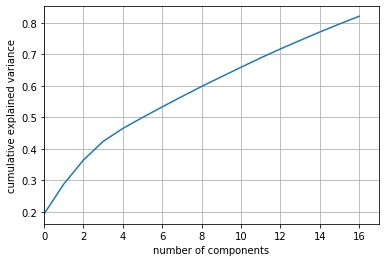

In [33]:
#pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
plt.xlim([0, 17])
plt.savefig("cumsum.png")

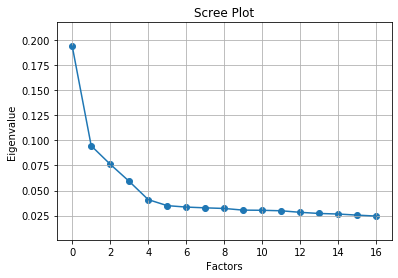

In [31]:
importance = pca.explained_variance_ratio_
plt.scatter(range(0,len(importance)),importance)
plt.plot(range(0,len(importance)),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()

plt.savefig("scree.png")

[0.19397229 0.09457632 0.07618788 0.05909845 0.04092675 0.03491029
 0.03348433 0.03271729 0.03209342 0.03044342 0.03028389 0.02977966
 0.02824775 0.02710589 0.02654996 0.0254523  0.02450931]
[6.59957809 3.21779894 2.59216343 2.01072451 1.39246329 1.18776344
 1.13924746 1.11315023 1.09192431 1.03578587 1.030358   1.01320244
 0.96108185 0.92223199 0.90331738 0.8659714  0.83388784]
17


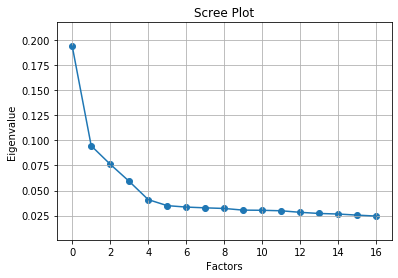

In [29]:
###  PCA
pca=PCA(n_components=0.8,copy=True, whiten=False)
train_cont_pca=pca.fit_transform(train_cont_std)

print(pca.explained_variance_ratio_) 
print(pca.explained_variance_)
print(pca.n_components_)


###   scree plot
importance = pca.explained_variance_ratio_
plt.scatter(range(0,len(importance)),importance)
plt.plot(range(0,len(importance)),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [13]:
# 查看降维后的数据
train_cont_pca = pd.DataFrame(data=train_cont_pca)
train_cont_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.268860,0.381646,-1.760466,-1.894529,0.291852,-1.365952,0.232003,0.100161,-0.581017,0.328434,0.343627,-0.044531,0.221168,-1.291644,-0.237141,-0.919455,0.445707,-0.783110,-0.587145,0.325288,0.356754
1,0.234692,-1.219468,0.872478,0.172572,-0.884243,0.841344,-2.616436,-0.544107,1.405291,-1.471712,2.017044,0.845041,-0.684537,-0.084121,-0.464822,-1.023433,-0.309934,0.182653,-0.947200,-1.358871,-0.557038
2,1.460243,0.258665,-1.529354,-1.320817,-0.412121,0.105801,-0.131522,0.024211,-0.639143,0.464421,-0.712258,-0.333856,0.232944,-0.142395,-0.095560,-0.111720,-0.519661,0.275089,-0.344782,1.109653,-0.511973
3,-0.597922,1.041181,0.876338,-0.350287,0.358966,-0.662084,0.591490,1.354668,-2.246761,-1.671348,-0.406042,1.522516,3.217773,0.451575,-0.938841,-0.121547,0.670280,0.315501,-1.155713,-1.463408,0.238058
4,4.148985,1.122895,-0.723462,-1.381232,-0.337570,0.506513,-0.864153,-0.087282,-0.659382,0.046773,-1.370338,-0.513748,0.076323,0.124281,-0.575367,-0.126546,-1.342867,-0.043627,0.772999,0.364295,0.163568


In [14]:
# 從原始檔案補回 saleprice
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [15]:
# 加上 id & saleprice
train_cont_final = pd.concat([train_cont_pca, train[['Id']],train[['SalePrice']]], axis = 1)
train_cont_final.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,Id,SalePrice
0,1.268860,0.381646,-1.760466,-1.894529,0.291852,-1.365952,0.232003,0.100161,-0.581017,0.328434,0.343627,-0.044531,0.221168,-1.291644,-0.237141,-0.919455,0.445707,-0.783110,-0.587145,0.325288,0.356754,1,208500
1,0.234692,-1.219468,0.872478,0.172572,-0.884243,0.841344,-2.616436,-0.544107,1.405291,-1.471712,2.017044,0.845041,-0.684537,-0.084121,-0.464822,-1.023433,-0.309934,0.182653,-0.947200,-1.358871,-0.557038,2,181500
2,1.460243,0.258665,-1.529354,-1.320817,-0.412121,0.105801,-0.131522,0.024211,-0.639143,0.464421,-0.712258,-0.333856,0.232944,-0.142395,-0.095560,-0.111720,-0.519661,0.275089,-0.344782,1.109653,-0.511973,3,223500
3,-0.597922,1.041181,0.876338,-0.350287,0.358966,-0.662084,0.591490,1.354668,-2.246761,-1.671348,-0.406042,1.522516,3.217773,0.451575,-0.938841,-0.121547,0.670280,0.315501,-1.155713,-1.463408,0.238058,4,140000
4,4.148985,1.122895,-0.723462,-1.381232,-0.337570,0.506513,-0.864153,-0.087282,-0.659382,0.046773,-1.370338,-0.513748,0.076323,0.124281,-0.575367,-0.126546,-1.342867,-0.043627,0.772999,0.364295,0.163568,5,250000


#### 把原始测试集映射到主成分组成的子空间中

In [16]:
test_cont_pca=pd.DataFrame(pca.transform(test_cont_std)) # 標準化之後的
test_cont_final=pd.concat([test_cont_pca, test[['Id']]], axis = 1)
test_cont_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,Id
0,-2.133956,-1.503781,0.809265,0.260339,-0.852527,-0.957951,0.667766,-1.231623,0.732673,0.289577,-0.123553,-0.139629,0.254716,-0.793621,-0.381392,0.611466,-1.326038,0.908395,0.838922,-0.613209,0.858637,1461
1,-0.863046,-0.183325,2.243686,-0.788409,0.501233,-2.011744,-0.883980,-2.706218,3.167302,11.527116,-1.197593,12.258806,-2.212309,6.516808,-4.605093,-2.675790,0.027267,-2.611310,2.941610,-0.297868,0.172591,1462
2,1.117456,0.246726,-1.008832,-1.460478,-0.466480,-2.249944,-0.406012,-0.324398,0.332955,0.150720,0.282958,-0.013042,-0.638319,0.003306,0.139412,0.143761,-0.181916,0.995046,-0.468342,-0.153311,-0.419353,1463
3,1.399703,0.567492,-1.239958,-1.119331,-0.501705,-1.751634,-0.722565,-0.099320,0.652655,-0.033001,-0.129280,-0.214566,-1.004397,0.770541,0.225283,0.384330,-1.051116,0.677953,0.053914,-0.531783,-0.265268,1464
4,-0.417226,-0.931940,-2.016099,1.117734,0.810922,-0.553157,2.933062,-1.000914,1.059436,0.121580,1.683309,0.133136,0.439668,-0.216516,0.629995,-0.078367,0.132947,1.066974,-0.488451,-0.686178,0.792360,1465


####  類別變數先不做處理

In [17]:
# 合併pca後的連續 跟類別
train_final=pd.concat([train_cont_final,train_cate], axis = 1)
print(train_final.shape) #有saleprice
train_final.head()

(1460, 219)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,Id,SalePrice,OverallQual,OverallCond,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,GarageFinish,Functional,Fence,LandSlope,PavedDrive,Street,Alley,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_unknown,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_unknown,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_unknown,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_unknown,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_unknown,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_unknown,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_unknown,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_unknown,CentralAir_N,CentralAir_Y
0,1.268860,0.381646,-1.760466,-1.894529,0.291852,-1.365952,0.232003,0.100161,-0.581017,0.328434,0.343627,-0.044531,0.221168,-1.291644,-0.237141,-0.919455,0.445707,-0.783110,-0.587145,0.325288,0.356754,1,208500,6,4,3,2,4,3,3,1,6,1,4,3,0,3,3,0,2,8,0,3,3,2,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0.234692,-1.219468,0.872478,0.172572,-0.

In [60]:
# 合併pca後的連續 跟類別
test_final=pd.concat([test_cont_final,test_cate], axis = 1)
test_final.shape

(1459, 218)

# Lasso Regression
- 懲罰係數(alpha)，自由調整參數大小。參數愈大，懲罰性愈強，愈不容易過度擬和，但同時也較無法貼近資料，因此係數的選擇也是很重要的，太大太小皆不宜。在沒有給定的情況下，預設為1。

- Lasso模型不僅能使用正規化(regulariztion)來優化模型，亦可以自動執行變數篩選(Feature selection)


In [19]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
from sklearn.linear_model import Ridge,RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

### choose the best alphas by cv=10

In [40]:
y=train_final['SalePrice']
X=train_final.drop("SalePrice", axis=1)

In [ ]:
# LASSO  交叉检验 cv=10

lassocv = LassoCV(alphas=None, copy_X=True, cv=10, eps=0.0001, fit_intercept=True,
    max_iter=50000, n_alphas=1000, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,verbose=False)
lassocv.fit(X, y)

In [53]:
lasso_best_alpha = lassocv.alpha_
print('最佳的alpha : ',lasso_best_alpha)
print('估計係數個數 : ',len(lassocv.coef_ ))
print('非0的係數個數 : ',np.sum(lassocv.coef_ != 0))

最佳的alpha :  141.16469686800968
估計係數個數 :  218
非0的係數個數 :  80


In [55]:
#基於最佳alpha值建模
lasso_model=Lasso(alpha = lasso_best_alpha,max_iter =50000,tol = 0.0001, normalize=False)
lasso_model.fit(X,y)

Lasso(alpha=141.16469686800968, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
## predict
y_pred=lasso_model.predict(test_final)

In [ ]:

## true y

y_true=pd.read_csv(path + r"\sample_submission.csv",sep=",",engine='python',index_col=0,)
y_true=y_true['SalePrice']

In [75]:
# 對答案

print('RMSE：',np.sqrt(mean_squared_error(y_true,y_pred)))  #Rmse
#print('r2_score : ',r2_score(y_true,y_pred)) 
print('RMLE:',mean_squared_log_error(y_true, y_pred)) #Kaggle評分標準

RMSE： 72412.98144620546
RMLE: 0.1830352622188651


In [64]:
#
result=pd.DataFrame({'Id':test.Id, 'SalePrice':y_pred})
result.to_csv("submission.csv",index=False)

# Ridge Regression 

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE：',np.sqrt(mean_squared_error(y_true,y_pred)))#Rmse

In [ ]:
from sklearn.metrics import mean_squared_log_error
print('RMLE:',mean_squared_log_error(y_true, y_pred)) 